# Data Preparation and Feature Engineering

## 1. Load data
## 2. Data validation
## 3. Feature engineering
## 4. Exploratory analysis
## 5. Save processed dataset


In [1]:
import pandas as pd

df = pd.read_csv('../data/mature_human_miRNAs.csv')

In [2]:
df.head(5)
df.shape
df.info(5)
df.describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2656 entries, 0 to 2655
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   header       2656 non-null   object
 1   sequence     2656 non-null   object
 2   mature_name  2656 non-null   object
 3   accession    2656 non-null   object
dtypes: object(4)
memory usage: 83.1+ KB


<bound method NDFrame.describe of                                                  header  \
0     >hsa-let-7a-5p MIMAT0000062 Homo sapiens let-7...   
1     >hsa-let-7a-3p MIMAT0004481 Homo sapiens let-7...   
2     >hsa-let-7a-2-3p MIMAT0010195 Homo sapiens let...   
3     >hsa-let-7b-5p MIMAT0000063 Homo sapiens let-7...   
4     >hsa-let-7b-3p MIMAT0004482 Homo sapiens let-7...   
...                                                 ...   
2651  >hsa-miR-12131 MIMAT0049025 Homo sapiens miR-1...   
2652  >hsa-miR-12132 MIMAT0049026 Homo sapiens miR-1...   
2653  >hsa-miR-12133 MIMAT0049027 Homo sapiens miR-1...   
2654  >hsa-miR-12135 MIMAT0049031 Homo sapiens miR-1...   
2655  >hsa-miR-12136 MIMAT0049032 Homo sapiens miR-1...   

                    sequence      mature_name     accession  
0     UGAGGUAGUAGGUUGUAUAGUU    hsa-let-7a-5p  MIMAT0000062  
1      CUAUACAAUCUACUGUCUUUC    hsa-let-7a-3p  MIMAT0004481  
2     CUGUACAGCCUCCUAGCUUUCC  hsa-let-7a-2-3p  MIMAT0010195  
3     UGA

miRNA table with 4 features
1. Full mature name of human miRNAs + accession (header)
2. sequence 
3. mature name
4. accession

2656 rows, 4 columns + index column

In [3]:
# Checking for missing values

missing_values = df.isna().sum()
missing_values

header         0
sequence       0
mature_name    0
accession      0
dtype: int64

In [4]:
# Checking duplicates

duplicates = df['mature_name'].duplicated()
duplicates_sum = df['mature_name'].duplicated().sum()
print(duplicates)
print(duplicates_sum)

0       False
1       False
2       False
3       False
4       False
        ...  
2651    False
2652    False
2653    False
2654    False
2655    False
Name: mature_name, Length: 2656, dtype: bool
0


In [5]:
# Validate string alphabet in all sequences
import re

alphabet_check = df['sequence'].str.match(r"^[ACGU]]+$")
alphabet_check

0       False
1       False
2       False
3       False
4       False
        ...  
2651    False
2652    False
2653    False
2654    False
2655    False
Name: sequence, Length: 2656, dtype: bool

In [6]:
# ensure all sequences are in upper case

df['sequence'] = df['sequence'].str.upper()
df['sequence'].head(5)

0    UGAGGUAGUAGGUUGUAUAGUU
1     CUAUACAAUCUACUGUCUUUC
2    CUGUACAGCCUCCUAGCUUUCC
3    UGAGGUAGUAGGUUGUGUGGUU
4    CUAUACAACCUACUGCCUUCCC
Name: sequence, dtype: object

In [7]:
alphabet_check

0       False
1       False
2       False
3       False
4       False
        ...  
2651    False
2652    False
2653    False
2654    False
2655    False
Name: sequence, Length: 2656, dtype: bool

In [8]:
# check sequence length of all sequences

df['length'] = df['sequence'].str.len()
df['length'].describe()

count    2656.000000
mean       21.606175
std         1.508052
min        16.000000
25%        21.000000
50%        22.000000
75%        22.000000
max        28.000000
Name: length, dtype: float64

In [9]:
# Seems like we have some miRNA outliers with shorter and longer sequence lenghts than expected. Let's check those out

# below 18 nt

miRNA_shorter = df[df['length']<18][['mature_name', 'sequence', 'accession', 'length']]
print(miRNA_shorter)

           mature_name           sequence     accession  length
863    hsa-miR-1227-5p  GUGGGGCCAGGCGGUGG  MIMAT0022941      17
905       hsa-miR-1297  UUCAAGUAAUUCAGGUG  MIMAT0005886      17
952       hsa-miR-1275  GUGGGGGAGAGGCUGUC  MIMAT0005929      17
954       hsa-miR-302e  UAAGUGCUUCCAUGCUU  MIMAT0005931      17
955       hsa-miR-302f  UAAUUGCUUCCAUGUUU  MIMAT0005932      17
...                ...                ...           ...     ...
1562      hsa-miR-4531  AUGGAGAAGGCUUCUGA  MIMAT0019070      17
1564      hsa-miR-4534  GGAUGGAGGAGGGGUCU  MIMAT0019073      17
1566      hsa-miR-4535  GUGGACCUGGCUGGGAC  MIMAT0019075      17
2373   hsa-miR-6852-3p  UGUCCUCUGUUCCUCAG  MIMAT0027605      17
2616  hsa-miR-10524-5p  CAGGAUGCCAGCAUAGU  MIMAT0041994      17

[66 rows x 4 columns]


In [10]:
# over 25 nt

miRNA_longer = df[df['length']>25][['mature_name', 'sequence','accession', 'length']]
miRNA_longer


,mature_name,sequence,accession,length
857,hsa-miR-1183,CACUGUAGGUGAUGGUGAGAGUGGGCA,MIMAT0005828,27
861,hsa-miR-1226-5p,GUGAGGGCAUGCAGGCCUGGAUGGGG,MIMAT0005576,26
916,hsa-miR-1244,AAGUAGUUGGUUUGUAUGAGAUGGUU,MIMAT0005896,26
921,hsa-miR-1248,ACCUUCUUGUAUAAGCACUGUGCUAAA,MIMAT0005900,27
949,hsa-miR-1272,GAUGAUGAUGGCAGCAAAUUCUGAAA,MIMAT0005925,26
1366,hsa-miR-3916,AAGAGGAAGAAAUGGCUGGUUCUCAG,MIMAT0018190,26
1545,hsa-miR-4518,GCUCAGGGAUGAUAACUGUGCUGAGA,MIMAT0019055,26
1638,hsa-miR-4665-3p,CUCGGCCGCGGCGCGUAGCCCCCGCC,MIMAT0019740,26
1669,hsa-miR-4685-5p,CCCAGGGCUUGGAGUGGGGCAAGGUU,MIMAT0019771,26
1696,hsa-miR-4700-3p,CACAGGACUGACUCCUCACCCCAGUG,MIMAT0019797,26


In [11]:
# Let's look at the nucleotide composition

df['A'] = df['sequence'].str.count('A')
df['C'] = df['sequence'].str.count('C')
df['G'] = df['sequence'].str.count('G')
df['U'] = df['sequence'].str.count('U')

(df["A"] + df["C"] + df["G"] + df["U"] == df["length"]).all()

np.True_

In [12]:
df.head()

,header,sequence,mature_name,accession,length,A,C,G,U
0,>hsa-let-7a-5p MIMAT0000062 Homo sapiens let-7...,UGAGGUAGUAGGUUGUAUAGUU,hsa-let-7a-5p,MIMAT0000062,22,5,0,8,9
1,>hsa-let-7a-3p MIMAT0004481 Homo sapiens let-7...,CUAUACAAUCUACUGUCUUUC,hsa-let-7a-3p,MIMAT0004481,21,5,6,1,9
2,>hsa-let-7a-2-3p MIMAT0010195 Homo sapiens let...,CUGUACAGCCUCCUAGCUUUCC,hsa-let-7a-2-3p,MIMAT0010195,22,3,9,3,7
3,>hsa-let-7b-5p MIMAT0000063 Homo sapiens let-7...,UGAGGUAGUAGGUUGUGUGGUU,hsa-let-7b-5p,MIMAT0000063,22,3,0,10,9
4,>hsa-let-7b-3p MIMAT0004482 Homo sapiens let-7...,CUAUACAACCUACUGCCUUCCC,hsa-let-7b-3p,MIMAT0004482,22,5,10,1,6


In [13]:
# Let's look at GC content

df['GC_content'] = (df['G'] + df['C'])/df['length']

df['GC_content'].head()

0    0.363636
1    0.333333
2    0.545455
3    0.454545
4    0.500000
Name: GC_content, dtype: float64

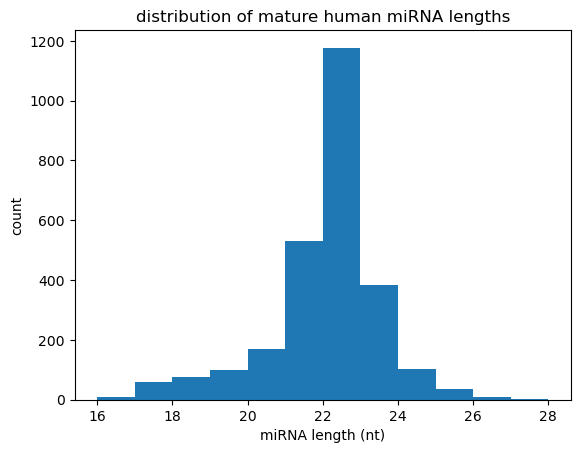

In [14]:
# Make a simple histogram to show the distribution of miRNA lengths

import matplotlib.pyplot as plt

plt.hist(df['length'], bins=range(df['length'].min(), df['length'].max()+1)) # alternatively, bins = range(16,29) because we know the range already
plt.xlabel('miRNA length (nt)')
plt.ylabel('count')
plt.title('distribution of mature human miRNA lengths')
plt.show()



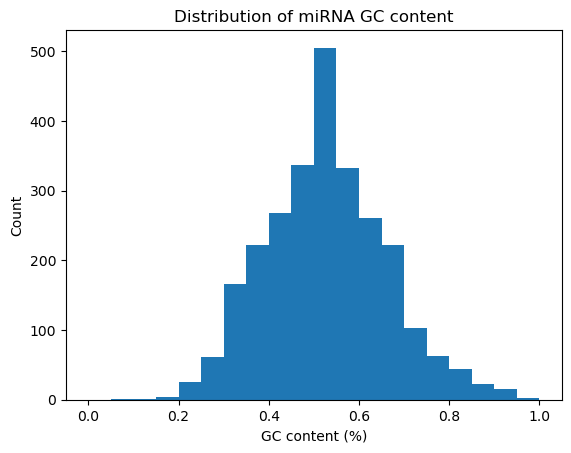

In [15]:
# Let's have a look at GC content distribution as well

import numpy as np

bins=np.arange(0, 1.05, 0.05)

plt.hist(df['GC_content'], bins=bins)
plt.xlabel('GC content (%)')
plt.ylabel('Count')
plt.title('Distribution of miRNA GC content')
plt.show()

GC content was binned in 5% intervals to allow biologically interpretable comparison across miRNAs.

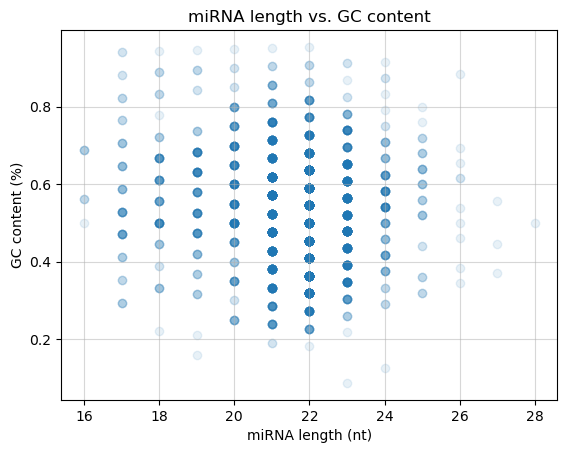

In [16]:
# Finally, let's make a scatter plot showing lenght vs GC content

plt.scatter(df['length'], df['GC_content'], alpha=0.1)
plt.xlabel('miRNA length (nt)')
plt.ylabel('GC content (%)')
plt.title('miRNA length vs. GC content')
plt.grid(True, alpha=0.5)
plt.show()

No lineaer relationship between miRNA length and GC content, which is expected. Plot clearly show clustering in the center, i.e. miRNA length and GC content are highly distributed towards 21-23 nt and 0.45 - 0,65 %, respectively.

In [17]:
df.to_csv('../data/mature_human_miRNAs_features.csv', index=False)

This notebook produced a cleaned, feature-augmented miRNA dataset for downstream analysis.